<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ChEMBL-Database" data-toc-modified-id="ChEMBL-Database-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ChEMBL Database</a></span></li><li><span><a href="#Installing-libraries" data-toc-modified-id="Installing-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installing libraries</a></span></li><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Search-for-Target-ABL-kinase-protein" data-toc-modified-id="Search-for-Target-ABL-kinase-protein-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Search for Target ABL kinase protein</a></span><ul class="toc-item"><li><span><a href="#Select-and-retrieve-bioactivity-data-for-Tyrosine-ABL-kinase" data-toc-modified-id="Select-and-retrieve-bioactivity-data-for-Tyrosine-ABL-kinase-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Select and retrieve bioactivity data for Tyrosine-ABL-kinase</a></span></li><li><span><a href="#Extracting-IC50-data" data-toc-modified-id="Extracting-IC50-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extracting IC50 data</a></span></li><li><span><a href="#Converting-data-to-dataframe" data-toc-modified-id="Converting-data-to-dataframe-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Converting data to dataframe</a></span></li></ul></li><li><span><a href="#Handling-missing-data" data-toc-modified-id="Handling-missing-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Handling missing data</a></span></li><li><span><a href="#Data-pre-processing-of-the-bioactivity-data" data-toc-modified-id="Data-pre-processing-of-the-bioactivity-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data pre-processing of the bioactivity data</a></span><ul class="toc-item"><li><span><a href="#Labeling-compounds-as-either-being-active,-inactive-or-intermediate" data-toc-modified-id="Labeling-compounds-as-either-being-active,-inactive-or-intermediate-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Labeling compounds as either being active, inactive or intermediate</a></span></li><li><span><a href="#Convert-IC50-to-pIC50" data-toc-modified-id="Convert-IC50-to-pIC50-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Convert IC50 to pIC50</a></span></li><li><span><a href="#Removing-the-'intermediate'-bioactivity-class" data-toc-modified-id="Removing-the-'intermediate'-bioactivity-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Removing the 'intermediate' bioactivity class</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(Chemical-Space-Analysis)-via-Lipinski-descriptors" data-toc-modified-id="Exploratory-Data-Analysis-(Chemical-Space-Analysis)-via-Lipinski-descriptors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors</a></span><ul class="toc-item"><li><span><a href="#Pairplot-of-the-features" data-toc-modified-id="Pairplot-of-the-features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Pairplot of the features</a></span></li><li><span><a href="#Boxplot-of-pIC50" data-toc-modified-id="Boxplot-of-pIC50-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Boxplot of pIC50</a></span></li><li><span><a href="#Boxplot-of-Lipinksi-descriptors" data-toc-modified-id="Boxplot-of-Lipinksi-descriptors-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Boxplot of Lipinksi descriptors</a></span></li></ul></li><li><span><a href="#Statistical-analysis-|-Mann-Whitney-U-Test" data-toc-modified-id="Statistical-analysis-|-Mann-Whitney-U-Test-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Statistical analysis | Mann-Whitney U Test</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## ChEMBL Database

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## Installing libraries

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [1]:
! pip install chembl_webresource_client
! conda install -c rdkit rdkit -y

Solving environment: done

# All requested packages already installed.



## Importing libraries

In [204]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.MolStandardize import rdMolStandardize
from chembl_webresource_client.new_client import new_client
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

## Search for Target ABL kinase protein

In [3]:
target = new_client.target
target_query = target.search('abl kinase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00521', 'xref_name': None, 'xre...",Abelson murine leukemia virus,Tyrosine-protein kinase V-ABL,23.0,False,CHEMBL5166,"[{'accession': 'P00521', 'component_descriptio...",SINGLE PROTEIN,11788
1,"[{'xref_id': 'P00519', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase ABL,18.0,False,CHEMBL1862,"[{'accession': 'P00519', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P00520', 'xref_name': None, 'xre...",Mus musculus,Tyrosine-protein kinase ABL,18.0,False,CHEMBL3099,"[{'accession': 'P00520', 'component_descriptio...",SINGLE PROTEIN,10090
3,"[{'xref_id': 'A1Z199', 'xref_name': None, 'xre...",Homo sapiens,BCR/ABL p210 fusion protein,17.0,False,CHEMBL6105,"[{'accession': 'A1Z199', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Bcr/Abl fusion protein,16.0,False,CHEMBL2096618,"[{'accession': 'P00519', 'component_descriptio...",CHIMERIC PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
1134,[],Homo sapiens,mTORC1,2.0,False,CHEMBL4296661,"[{'accession': 'P42345', 'component_descriptio...",PROTEIN COMPLEX,9606
1135,[],Homo sapiens,mTOR/FKBP12A/FKBP12B,2.0,False,CHEMBL4296662,"[{'accession': 'P62942', 'component_descriptio...",PROTEIN COMPLEX,9606
1136,[],Homo sapiens,Fibroblast growth factor receptor,1.0,False,CHEMBL2095217,"[{'accession': 'P22607', 'component_descriptio...",PROTEIN FAMILY,9606
1137,[],Mus musculus,Fibroblast growth factor receptor,1.0,False,CHEMBL2111391,"[{'accession': 'P21803', 'component_descriptio...",PROTEIN FAMILY,10090


### Select and retrieve bioactivity data for Tyrosine-ABL-kinase

In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1862'

Here, we will retrieve only bioactivity data for *ABL kinase* (CHEMBL1862) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

### Extracting IC50 data

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

### Converting data to dataframe

In [122]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,129828,[],CHEMBL819326,Inhibition of c-Abl kinase,B,BAO_0000190,BAO_0000357,single protein format,COc1ccc(-c2[nH]nc3c2C(=O)c2ccccc2-3)cc1,...,Homo sapiens,Tyrosine-protein kinase ABL,9606,None,None,IC50,uM,UO_0000065,None,725.0
1,None,146141,[],CHEMBL806527,Radioligand displacement assay for the binding...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,...,Homo sapiens,Tyrosine-protein kinase ABL,9606,None,None,IC50,uM,UO_0000065,None,4.0
2,None,146143,[],CHEMBL762575,Inhibition of [35S]-labeled SH2-GST Abl bindin...,B,BAO_0000190,BAO_0000219,cell-based format,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,...,Homo sapiens,Tyrosine-protein kinase ABL,9606,None,None,IC50,uM,UO_0000065,None,16.0


In [123]:
df.standard_type.unique()

array(['IC50'], dtype=object)

## Handling missing data
If any compounds has missing value for the **standard_value** column then drop it

In [124]:
df = df[df.standard_value.notna()]

Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

## Data pre-processing of the bioactivity data

### Labeling compounds as either being active, inactive or intermediate
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [125]:
df['standard_value'] = df['standard_value'].astype(float)
df['bioactivity_class'] = df['standard_value'].map(lambda x : 'active' if x <= 1000 else ('inactive' if x >=10000 else 'intermediate'))

In [126]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value','bioactivity_class']
df = df[selection]
df.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL281470,COc1ccc(-c2[nH]nc3c2C(=O)c2ccccc2-3)cc1,725000.0,inactive
1,CHEMBL13462,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,4000.0,intermediate
2,CHEMBL13462,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,16000.0,inactive
3,CHEMBL414123,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,15000.0,inactive
4,CHEMBL414123,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,2900.0,intermediate


In [127]:
df.canonical_smiles.replace('nan',np.nan, inplace=True)
df.dropna(inplace=True)

In [129]:
'''
function to estimate molecule Lipinski descriptors

'''

def lipinski(smiles, verbose=False):
    moldata= []
    problematic_smiles=[]
    for i,elem in enumerate(smiles):
        try:
            mol=Chem.MolFromSmiles(elem) 
            mol = rdMolStandardize.Cleanup(mol)
            moldata.append(mol)  
        except:
            problematic_smiles.append(i)
            pass
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return  descriptors,problematic_smiles

In [108]:
df_lipinski, problematic_smiles = lipinski(df.canonical_smiles)

RDKit INFO: [21:47:02] Initializing MetalDisconnector
RDKit INFO: [21:47:02] Running MetalDisconnector
RDKit INFO: [21:47:02] Initializing Normalizer
RDKit INFO: [21:47:02] Running Normalizer
RDKit INFO: [21:47:02] Initializing MetalDisconnector
RDKit INFO: [21:47:02] Running MetalDisconnector
RDKit INFO: [21:47:02] Initializing Normalizer
RDKit INFO: [21:47:02] Running Normalizer
RDKit INFO: [21:47:02] Initializing MetalDisconnector
RDKit INFO: [21:47:02] Running MetalDisconnector
RDKit INFO: [21:47:02] Initializing Normalizer
RDKit INFO: [21:47:02] Running Normalizer
RDKit INFO: [21:47:02] Initializing MetalDisconnector
RDKit INFO: [21:47:02] Running MetalDisconnector
RDKit INFO: [21:47:02] Initializing Normalizer
RDKit INFO: [21:47:02] Running Normalizer
RDKit INFO: [21:47:02] Initializing MetalDisconnector
RDKit INFO: [21:47:02] Running MetalDisconnector
RDKit INFO: [21:47:02] Initializing Normalizer
RDKit INFO: [21:47:02] Running Normalizer
RDKit INFO: [21:47:02] Initializing Meta

RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalize

RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing MetalDisconnector
RDKit INFO: [21:48:23] Running MetalDisconnector
RDKit INFO: [21:48:23] Initializing Normalizer
RDKit INFO: [21:48:23] Running Normalizer
RDKit INFO: [21:48:23] Initializing Meta

RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Norm

RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalize

RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing Meta

RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Normalizer
RDKit INFO: [21:48:24] Running Normalizer
RDKit INFO: [21:48:24] Initializing MetalDisconnector
RDKit INFO: [21:48:24] Running MetalDisconnector
RDKit INFO: [21:48:24] Initializing Norm

RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisc

RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Norm

RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing Meta

RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisc

RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:25] Initializing MetalDisconnector
RDKit INFO: [21:48:25] Running MetalDisconnector
RDKit INFO: [21:48:25] Initializing Normalizer
RDKit INFO: [21:48:25] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Norm

RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing Meta

RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisc

RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing Meta

RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisconnector
RDKit INFO: [21:48:26] Initializing Normalizer
RDKit INFO: [21:48:26] Running Normalizer
RDKit INFO: [21:48:26] Initializing MetalDisconnector
RDKit INFO: [21:48:26] Running MetalDisc

RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Norm

RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing Meta

RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisc

RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:27] Initializing MetalDisconnector
RDKit INFO: [21:48:27] Running MetalDisconnector
RDKit INFO: [21:48:27] Initializing Normalizer
RDKit INFO: [21:48:27] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Norm

RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing Meta

RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisc

RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Normalizer
RDKit INFO: [21:48:28] Running Normalizer
RDKit INFO: [21:48:28] Initializing MetalDisconnector
RDKit INFO: [21:48:28] Running MetalDisconnector
RDKit INFO: [21:48:28] Initializing Norm

RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing Meta

RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisc

RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Norm

RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing MetalDisconnector
RDKit INFO: [21:48:29] Running MetalDisconnector
RDKit INFO: [21:48:29] Initializing Normalizer
RDKit INFO: [21:48:29] Running Normalizer
RDKit INFO: [21:48:29] Initializing Meta

RDKit INFO: [21:48:30] Running MetalDisconnector
RDKit INFO: [21:48:30] Initializing Normalizer
RDKit INFO: [21:48:30] Running Normalizer
RDKit INFO: [21:48:30] Initializing MetalDisconnector
RDKit INFO: [21:48:30] Running MetalDisconnector
RDKit INFO: [21:48:30] Initializing Normalizer
RDKit INFO: [21:48:30] Running Normalizer
RDKit INFO: [21:48:30] Initializing MetalDisconnector
RDKit INFO: [21:48:30] Running MetalDisconnector
RDKit INFO: [21:48:30] Initializing Normalizer
RDKit INFO: [21:48:30] Running Normalizer
RDKit INFO: [21:48:30] Initializing MetalDisconnector
RDKit INFO: [21:48:30] Running MetalDisconnector
RDKit INFO: [21:48:30] Initializing Normalizer
RDKit INFO: [21:48:30] Running Normalizer
RDKit INFO: [21:48:30] Initializing MetalDisconnector
RDKit INFO: [21:48:30] Running MetalDisconnector
RDKit INFO: [21:48:30] Initializing Normalizer
RDKit INFO: [21:48:30] Running Normalizer
RDKit INFO: [21:48:30] Initializing MetalDisconnector
RDKit INFO: [21:48:30] Running MetalDisc

In [162]:
problematic_smiles

[]

In [163]:
df_lipinski.head(10).style.background_gradient()

,MW,LogP,NumHDonors,NumHAcceptors
0,276.295000,3.296700,1.000000,3.000000
1,569.592000,2.373800,5.000000,6.000000
2,569.592000,2.373800,5.000000,6.000000
3,1473.536000,-1.080600,17.000000,19.000000
4,1473.536000,-1.080600,17.000000,19.000000
5,1507.544000,-0.325100,17.000000,18.000000
6,1507.544000,-0.325100,17.000000,18.000000
7,525.583000,2.919000,4.000000,5.000000
8,525.583000,2.919000,4.000000,5.000000
9,603.600000,3.129300,5.000000,5.000000


In [164]:
df = pd.concat([df,df_lipinski], axis=1)

In [165]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,norm_value,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL281470,COc1ccc(-c2[nH]nc3c2C(=O)c2ccccc2-3)cc1,725000.0,inactive,725000.0,3.139662,276.295,3.2967,1.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,569.592,2.3738,5.0,6.0
2,CHEMBL13462,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,16000.0,inactive,16000.0,4.795880,569.592,2.3738,5.0,6.0
3,CHEMBL414123,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,15000.0,inactive,15000.0,4.823909,1473.536,-1.0806,17.0,19.0
4,NaN,NaN,NaN,NaN,NaN,NaN,1473.536,-1.0806,17.0,19.0


### Convert IC50 to pIC50
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [260]:
def pIC50(i):
    molar = i*(10**-9) # Converts nM to M
    pIC50 = -np.log10(molar)
    return pIC50

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [261]:
df.standard_value.describe()

count      2159.000000
mean       8816.954530
std       33568.590524
min           0.015000
25%           2.850000
50%          13.000000
75%         463.000000
max      725000.000000
Name: standard_value, dtype: float64

In [262]:
df['norm_value'] = df['standard_value'].map(lambda x: 100000000 if x> 100000000 else x)
df['pIC50'] = df['norm_value'].map(pIC50)

### Removing the 'intermediate' bioactivity class
Here, we will be removing the ``intermediate`` class from our data set.

In [263]:
df = df[df['bioactivity_class'] != 'intermediate']

In [264]:
df['bioactivity_class'].value_counts()

active      1756
inactive     403
Name: bioactivity_class, dtype: int64

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

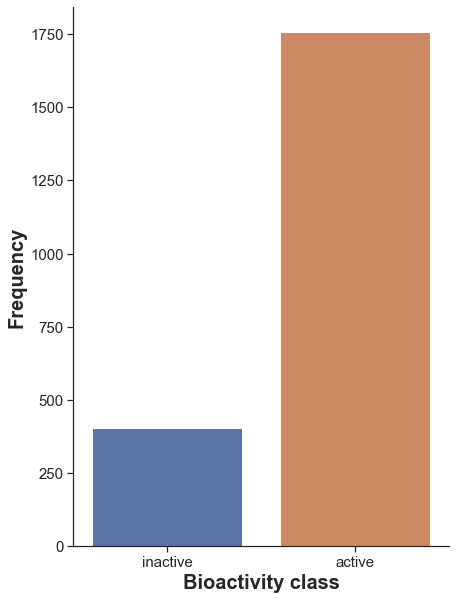

In [277]:
plt.figure(figsize=(6.5, 8.5))

sns.countplot(x='bioactivity_class', data=df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.set(style='ticks')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('plot_bioactivity_class.png')

### Pairplot of the features

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

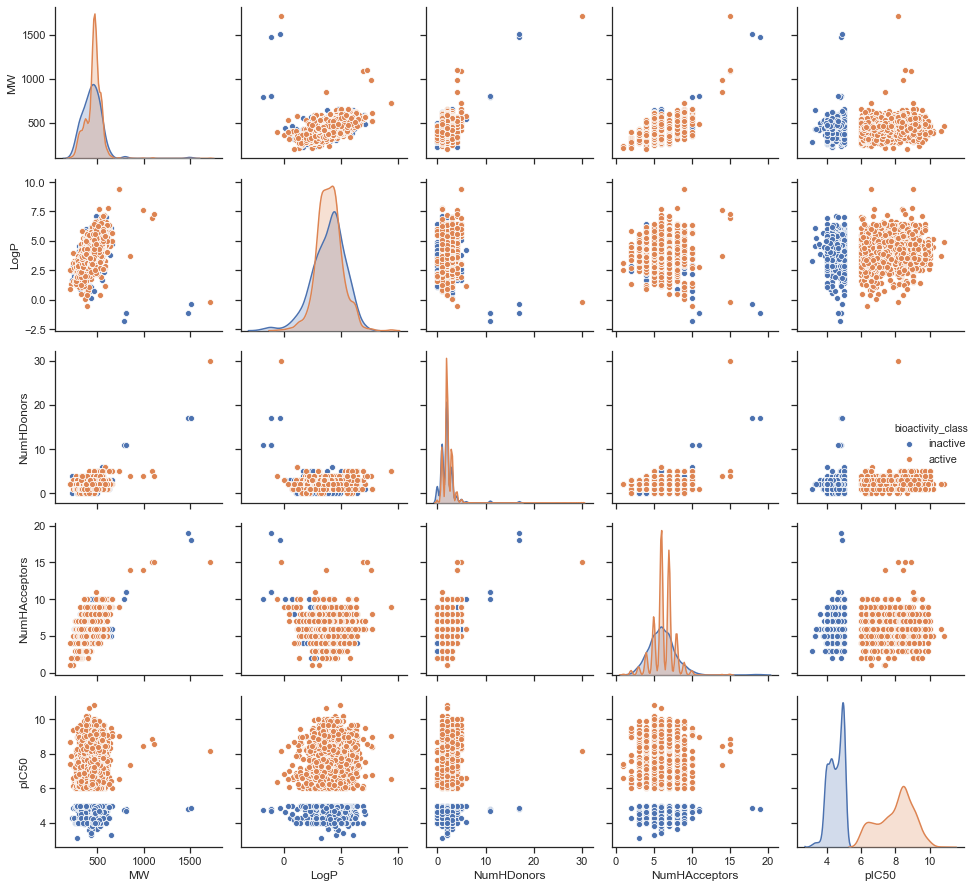

In [278]:
selection = ['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
sns.pairplot(df[selection], hue='bioactivity_class')
plt.tight_layout()
plt.savefig('Pairplot.png',dpi=300)

### Boxplot of pIC50

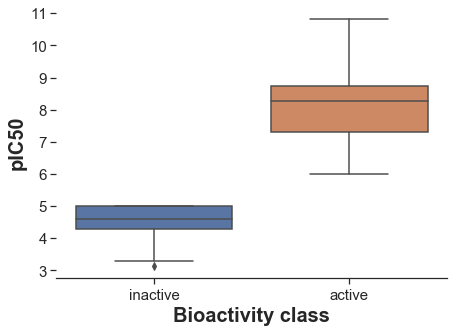

In [275]:
fig = plt.figure(figsize=(7,5))
sns.boxplot(x='bioactivity_class', y='pIC50', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('pIC50', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine(top=True, left=True)
plt.savefig('boxplot_pIC50.png',dpi=300);

### Boxplot of Lipinksi descriptors

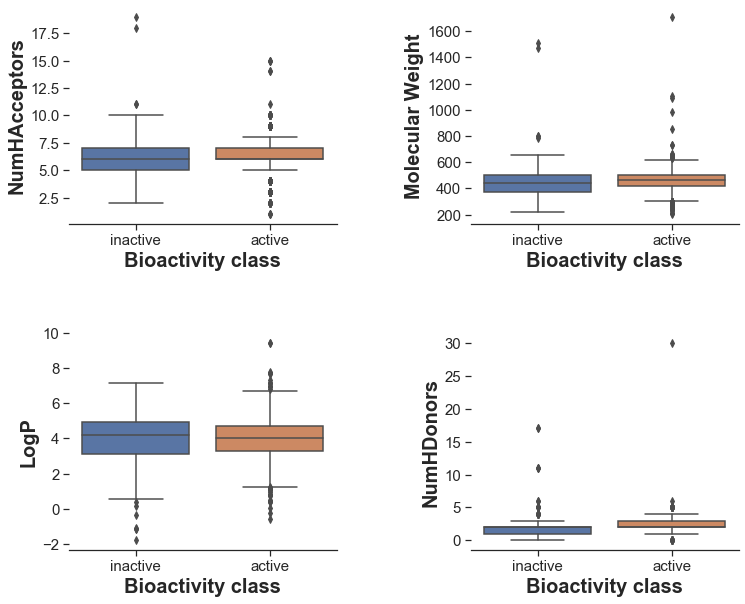

In [276]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
fig.add_subplot(2,2,1)
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHAcceptors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,2)
sns.boxplot(x='bioactivity_class', y='MW', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Molecular Weight', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,3)
sns.boxplot(x='bioactivity_class', y='LogP', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('LogP', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,4)
sns.boxplot(x='bioactivity_class', y='NumHDonors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHDonors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

sns.despine(top=True, left=True)
plt.savefig('boxplot_lipinksi_descriptors.png',dpi=300);

## Statistical analysis | Mann-Whitney U Test

In [269]:
def mannwhitney_(active,inactive, descriptor):
  stat, p = mannwhitneyu(active,inactive)
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [271]:
for feature in selection[1:]: 
    results=mannwhitney_(df[df['bioactivity_class'] != 'inactive'][feature],
                df[df['bioactivity_class'] ==  'inactive'][feature],
                feature)
    display(results)

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,389383.5,0.000945,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,422164.0,0.247121,0.05,Same distribution (fail to reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,373545.0,0.000002,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,394712.5,0.002673,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.434204e-223,0.05,Different distribution (reject H0)


In [274]:
df.to_csv('abl_kinase-data.csv')

## Conclusion

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.


All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.